<a href="https://colab.research.google.com/github/aksasaji/LuminarProjects/blob/main/positionsalaryregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Salary Prediction - Polynomial Linear Regression**

This dataset contains salary data for different positions with different levels. Here we have to predict the salary based on their level.

In [ ]:
# Import Dataset
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/dataset/Position_Salaries (1).csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [ ]:
# Taking care null values
df.isna().sum()

In [ ]:
X=df.iloc[:,1:2]
X

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [ ]:
y=df.iloc[:,-1]
y

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

In [ ]:
# Training the polynomial linear regression model on the whole dataset
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X,y)
y_pred=reg.predict(X)
y_pred

array([-114454.54545455,  -33575.75757576,   47303.03030303,
        128181.81818182,  209060.60606061,  289939.39393939,
        370818.18181818,  451696.96969697,  532575.75757576,
        613454.54545455])

In [ ]:
#Comparing Actual and predicted values
result=pd.DataFrame({'Actual':y,'Predicted':y_pred})
result

,Actual,Predicted
0,45000,-114454.545455
1,50000,-33575.757576
2,60000,47303.030303
3,80000,128181.818182
4,110000,209060.606061
5,150000,289939.393939
6,200000,370818.181818
7,300000,451696.969697
8,500000,532575.757576
9,1000000,613454.545455


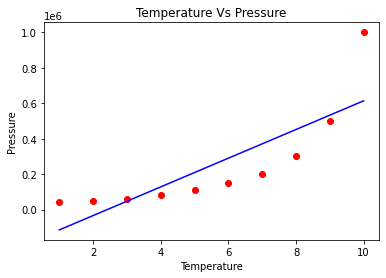

In [ ]:
# Visualizing the linear regression result
import matplotlib.pyplot as plt
plt.scatter(X,y,color='red')
plt.plot(X,y_pred,color='blue')
plt.title('Temperature Vs Pressure')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np
print('Mean Absolute Error:',mean_absolute_error(y,y_pred))
print('Mean Squared Error:',mean_squared_error(y,y_pred))
print('Root Mean squared error',np.sqrt(mean_squared_error(y,y_pred)))
print('R2 Score:',r2_score(y,y_pred))

Mean Absolute Error: 128454.54545454546
Mean Squared Error: 26695878787.878784
Root Mean squared error 163388.73519272613
R2 Score: 0.6690412331929895


In [ ]:
# Training Linear Regression model on polynomial features as well as y
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=6)
x_poly=poly.fit_transform(X)
x_poly

array([[1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00,
        1.00000e+00, 1.00000e+00],
       [1.00000e+00, 2.00000e+00, 4.00000e+00, 8.00000e+00, 1.60000e+01,
        3.20000e+01, 6.40000e+01],
       [1.00000e+00, 3.00000e+00, 9.00000e+00, 2.70000e+01, 8.10000e+01,
        2.43000e+02, 7.29000e+02],
       [1.00000e+00, 4.00000e+00, 1.60000e+01, 6.40000e+01, 2.56000e+02,
        1.02400e+03, 4.09600e+03],
       [1.00000e+00, 5.00000e+00, 2.50000e+01, 1.25000e+02, 6.25000e+02,
        3.12500e+03, 1.56250e+04],
       [1.00000e+00, 6.00000e+00, 3.60000e+01, 2.16000e+02, 1.29600e+03,
        7.77600e+03, 4.66560e+04],
       [1.00000e+00, 7.00000e+00, 4.90000e+01, 3.43000e+02, 2.40100e+03,
        1.68070e+04, 1.17649e+05],
       [1.00000e+00, 8.00000e+00, 6.40000e+01, 5.12000e+02, 4.09600e+03,
        3.27680e+04, 2.62144e+05],
       [1.00000e+00, 9.00000e+00, 8.10000e+01, 7.29000e+02, 6.56100e+03,
        5.90490e+04, 5.31441e+05],
       [1.00000e+00, 1.00000

In [ ]:
lr1=LinearRegression()
lr1.fit(x_poly,y)

LinearRegression()

In [ ]:
y_poly=lr1.predict(x_poly)
y_poly

array([ 45190.55943869,  49086.82983543,  61383.44988125,  79877.62237523,
       108808.85780703, 149282.05128115, 203940.5594407 , 295889.27739075,
       501867.71562109, 999673.07692867])

In [ ]:
result1=pd.DataFrame({'Actual':y,'Simplelr':y_pred,'polyr':y_poly})
result1

,Actual,Simplelr,polyr
0,45000,-114454.545455,45190.559439
1,50000,-33575.757576,49086.829835
2,60000,47303.030303,61383.449881
3,80000,128181.818182,79877.622375
4,110000,209060.606061,108808.857807
5,150000,289939.393939,149282.051281
6,200000,370818.181818,203940.559441
7,300000,451696.969697,295889.277391
8,500000,532575.757576,501867.715621
9,1000000,613454.545455,999673.076929


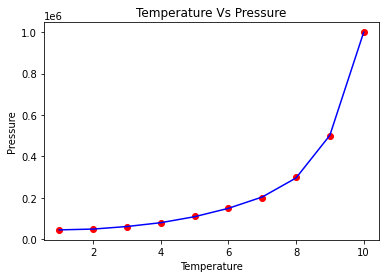

In [ ]:
# Visualizing the Polynomial linear regression result
import matplotlib.pyplot as plt
plt.scatter(X,y,color='red')
plt.plot(X,y_poly,color='blue')
plt.title('Temperature Vs Pressure')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np
print('Mean Absolute Error:',mean_absolute_error(y,y_poly))
print('Mean Squared Error:',mean_squared_error(y,y_poly))
print('Root Mean squared error',np.sqrt(mean_squared_error(y,y_poly)))
print('R2 Score:',r2_score(y,y_poly))

Mean Absolute Error: 1476.456876346717
Mean Squared Error: 4075466.200466155
Root Mean squared error 2018.7783931046406
R2 Score: 0.9999494749253776
